# Package Installations

In [1]:
#! pip install numpy opencv-python matplotlib pillow imutils

# Package Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import imutils
import json

from PIL import Image

# Global Parameters

In [3]:
IMAGE_PATH = "./images/room_maps/Earth Sciences_162_thresholded.png"
OUTPUT_PATH = "./json/seat_positions/Earth Sciences_162_v2.json"

# Display Original Image

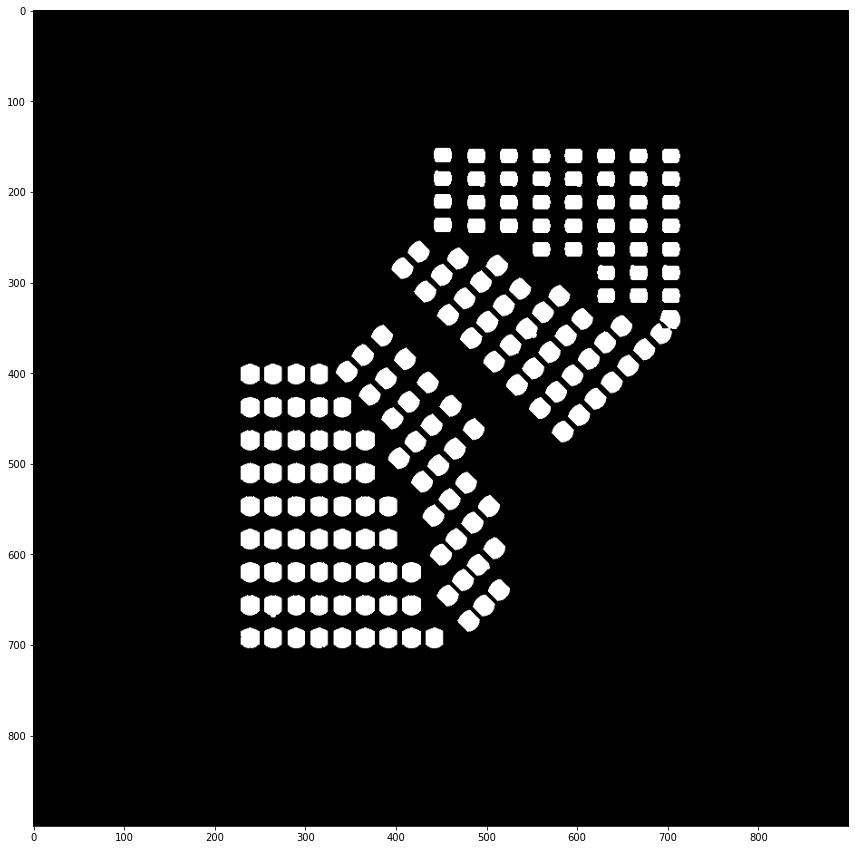

In [4]:
image = cv2.imread(IMAGE_PATH)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.figure(figsize = (15, 15))
plt.imshow(image_gray, cmap = 'gray')

# Pre-Process Image

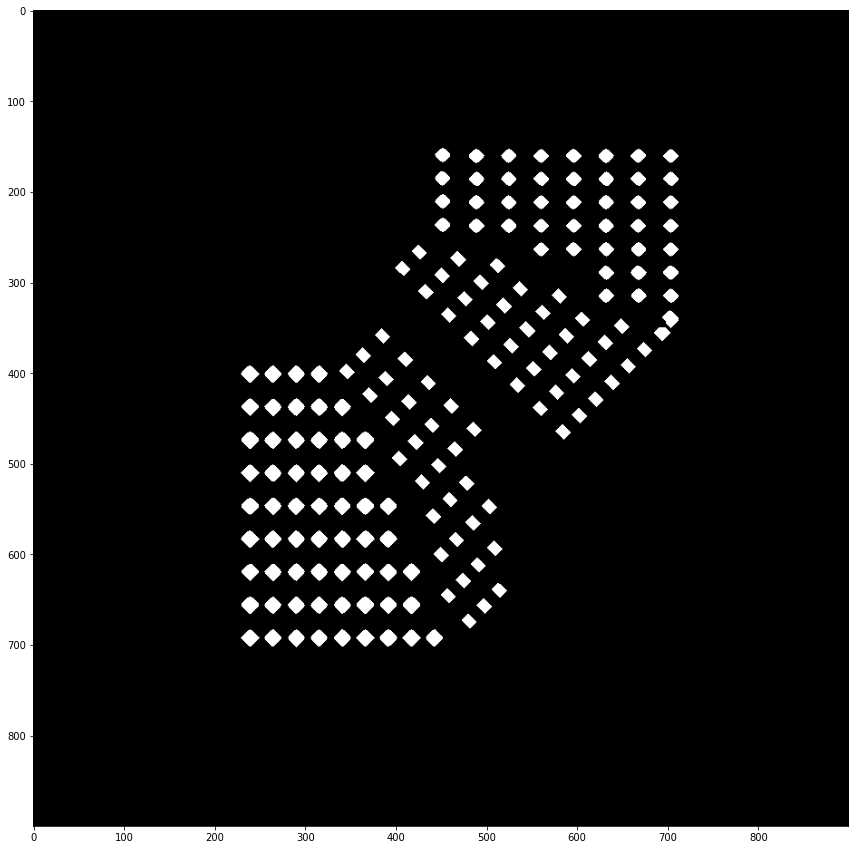

In [5]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
dilated = cv2.dilate(image_gray, kernel)
blurred = cv2.medianBlur(dilated, 5)
ret, thresholded = cv2.threshold(blurred, 127, 255, 0)
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(thresholded,kernel,iterations = 3)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
dilated = cv2.dilate(erosion, kernel, iterations = 5)

plt.figure(figsize = (15, 15))
plt.imshow(dilated, cmap = 'gray')

# Identify & Label Seats

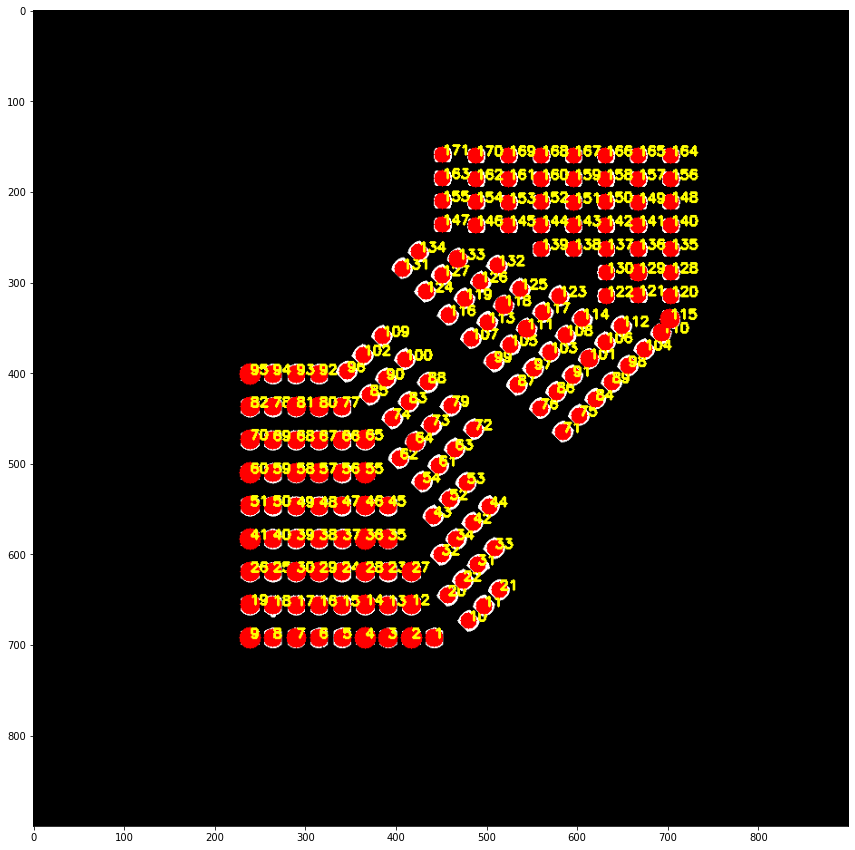

In [6]:
height, width, _ = image.shape
contours = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)
image = cv2.imread(IMAGE_PATH)
ID = 1
SEATS = []

for c in contours:
    # compute the center of the contour
#     M = cv2.moments(c)
#     cX = int(M["m10"] / M["m00"])
#     cY = int(M["m01"] / M["m00"])
#     cv2.circle(image, (cX, cY), 14, (255, 0, 0), -1)
#     cv2.putText(image, str(ID), (cX, cY),
#     cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 2)
    (x, y), r = cv2.minEnclosingCircle(c)
    x, y, r = int(x), int(y), int(r * 1.2)
    
    cv2.circle(image, (x, y), r, (255, 0, 0), -1)
    cv2.putText(image, str(ID), (x, y),
    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 2)
    
    
    SEATS.append({
        'x' : x / width,
        'y' : y / height,
        'r' : r / width,
        'id' : ID
    })
    
    ID += 1
    
plt.figure(figsize = (15, 15))
plt.imshow(image)

In [7]:
# determine relative to physical distances for ENC 170

anchor_seats = {}

for seat in SEATS:
    if seat['id'] in [10, 12, 48]:
        anchor_seats[seat['id']] = seat

seat_A = anchor_seats[12]
seat_B = anchor_seats[10]
seat_C = anchor_seats[48]

x_diff_relative = abs(seat_A['x'] - seat_B['x'])
y_diff_relative = abs(seat_A['y'] - seat_C['y'])

x_scale_one_metre_to_relative = x_diff_relative / 2
y_scale_one_metre_to_relative = y_diff_relative / 2

print(x_scale_one_metre_to_relative)
print(y_scale_one_metre_to_relative)

0.035
0.06


In [8]:
# determine relative to physical distances for ES 162

anchor_seats = {}

for seat in SEATS:
    if seat['id'] in [9, 6, 26]:
        anchor_seats[seat['id']] = seat

seat_A = anchor_seats[9]
seat_B = anchor_seats[6]
seat_C = anchor_seats[26]

x_diff_relative = abs(seat_A['x'] - seat_B['x'])
y_diff_relative = abs(seat_A['y'] - seat_C['y'])

x_scale_one_metre_to_relative = x_diff_relative / 2
y_scale_one_metre_to_relative = y_diff_relative / 2

print(x_scale_one_metre_to_relative)
print(y_scale_one_metre_to_relative)

0.04222222222222222
0.04055555555555551


# Save JSON File

In [9]:
DATA = {
    'SEATS' : SEATS,
    'X_SCALE' : x_scale_one_metre_to_relative,
    'Y_SCALE' : y_scale_one_metre_to_relative
}

In [10]:
with open(OUTPUT_PATH, 'w') as fout:
    json.dump(DATA, fout)

# Workbench

In [11]:
plt.imshow(cimg)

NameError: name 'cimg' is not defined

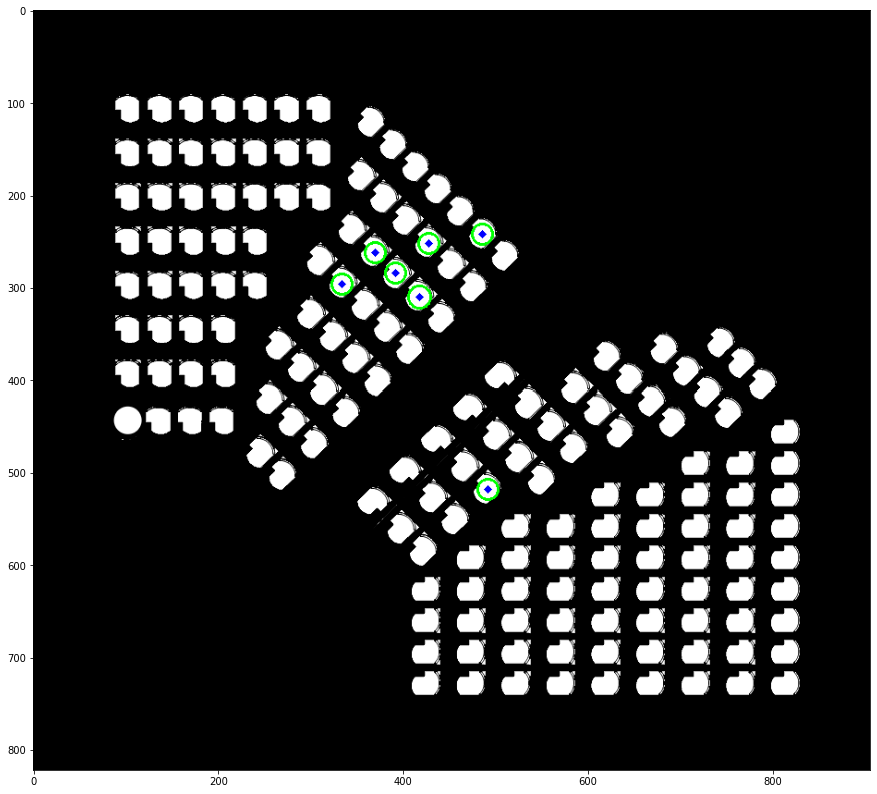

In [36]:
img = cv2.imread(IMAGE_PATH, 0)
img = cv2.medianBlur(img,5)
#cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
image = cv2.imread(IMAGE_PATH)


circles = cv2.HoughCircles(dilated,cv2.HOUGH_GRADIENT,1,3,
                            param1=50,param2=30, minRadius=0,maxRadius=100)

circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(image,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(image,(i[0],i[1]),2,(0,0,255),3)

plt.figure(figsize = (15, 15))
plt.imshow(image)

1